<h1>KeyPoint Detection Competition</h1>
<hr/>
<ul>
    <li>Name: Yunxiang Liu</li>
    <li>Wechat Account: Claude13786489290</li>
    <li>Github Name: iClaude1998</li>
    <li>Email: 1316761893@qq.com</li>
</ul>
<h2>Task 1 </h2> <p>Load data, view a sample</p>

In [1]:
import cv2
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

In [2]:
train_path = '../xfdata/train.npy/train.npy'
test_path = '../xfdata/test.npy/test.npy'
label_path = '../xfdata/train.csv'

labels = pd.read_csv(label_path)
train_imgs = np.load(train_path)
test_imgs = np.load(test_path)

print('The key points coordinates(partial): \n {}'.format(labels.head(5)))
print('The training dataset storage data in format: {}'.format(train_imgs.shape))
print('The test dataset storage data in format: {}'.format(test_imgs.shape))


The key points coordinates(partial): 
    left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0          66.342364          38.523613           28.930840   
1          68.912604          31.409117           29.652226   
2          68.708994          40.371149           27.130820   
3          65.334176          35.471878           29.366461   
4          68.634857          29.999486           31.094571   

   right_eye_center_y  nose_tip_x  nose_tip_y  mouth_center_bottom_lip_x  \
0           35.577773   49.256845   68.275955                  47.783946   
1           33.028075   51.913358   48.408453                  50.698868   
2           40.940680   44.502523   69.988486                  45.926427   
3           37.767684   50.411373   64.934767                  50.028780   
4           29.616429   50.247429   51.450857                  47.948571   

   mouth_center_bottom_lip_y  
0                  85.361582  
1                  79.574038  
2                  86.221009  
3

Let's view a sample image and its corresponding keypoints

In [5]:
def view_sample(img, labels, index):
    plt.imshow(np.uint8(img[:, :, index]), cmap='gray')
    # The pandas, numpy has different view rules
    if isinstance(labels, np.ndarray):
        plt.scatter(labels[[i for i in range(0, labels.size, 2)]], 
                    labels[[i for i in range(1, labels.size, 2)]],
                   c='r')
    else:
        plt.scatter(labels.iloc[index].iloc[[i for i in range(0, len(labels.iloc[index]), 2)]],
                   labels.iloc[index].iloc[[i for i in range(1, len(labels.iloc[index]), 2)]],
                   c='r')
    plt.show()
        
    
    

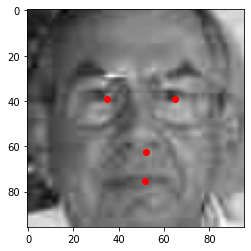

In [6]:
view_sample(train_imgs, labels, 50)